<a href="https://colab.research.google.com/github/alek00sandra/uczenie_maszynowe/blob/main/kurs_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Matematyczna magia perceptronu Rosenblatt'a

In [2]:
import numpy as np
 
X = np.arange(-25, 25, 1).reshape(10,5)
 
ones = np.ones((X.shape[0], 1))
 
X_1 = np.append(X.copy(), ones, axis=1)
 
w = np.random.rand(X_1.shape[1])
 
 
def predict(x, w):     
    total_stimulation = np.dot(x, w)       
    y_pred = 1 if total_stimulation > 0 else -1
    return y_pred
 
    
print(predict(X_1[0,], w))
 
for x in X_1:
    y_pred = predict(x, w)
    print(y_pred)
    

-1
-1
-1
-1
-1
-1
1
1
1
1
1


In [3]:
import numpy as np
 
X = np.arange(-25, 25, 1).reshape(10,5)
 
ones = np.ones((X.shape[0], 1))
 
X_1 = np.append(X.copy(), ones, axis=1)
 
w = np.random.rand(X_1.shape[1])
 
 
def predict(x, w):     
    total_stimulation = np.dot(x, w)       
    y_pred = 1 if total_stimulation > 0 else -1
    return y_pred
    
y = np.array([1, -1, -1, 1, -1, 1, -1, -1, 1, -1])
eta = 0.01
 
epochs = 10
 
for e in range(epochs):
    for x, y_target in zip(X_1,y):
        y_pred = predict(x, w)
        delta_w = eta * (y_target - y_pred) * x
        w += delta_w
        print(w)

[-0.20555975  0.06394008 -0.37862709 -0.19438143 -0.0617305   0.25413534]
[ 0.19444025  0.44394008 -0.01862709  0.14561857  0.2582695   0.23413534]
[ 0.19444025  0.44394008 -0.01862709  0.14561857  0.2582695   0.23413534]
[-0.00555975  0.26394008 -0.17862709  0.00561857  0.1382695   0.25413534]
[-0.00555975  0.26394008 -0.17862709  0.00561857  0.1382695   0.25413534]
[-0.00555975  0.26394008 -0.17862709  0.00561857  0.1382695   0.25413534]
[-0.10555975  0.14394008 -0.31862709 -0.15438143 -0.0417305   0.23413534]
[-0.10555975  0.14394008 -0.31862709 -0.15438143 -0.0417305   0.23413534]
[0.19444025 0.46394008 0.02137291 0.20561857 0.3382695  0.25413534]
[-0.20555975  0.04394008 -0.41862709 -0.25438143 -0.1417305   0.23413534]
[-0.20555975  0.04394008 -0.41862709 -0.25438143 -0.1417305   0.23413534]
[ 0.19444025  0.42394008 -0.05862709  0.08561857  0.1782695   0.21413534]
[ 0.19444025  0.42394008 -0.05862709  0.08561857  0.1782695   0.21413534]
[-0.00555975  0.24394008 -0.21862709 -0.0543

Implementacja perceptronu

Epoch: 0, weights: [ 0.17441611 -0.5878292  -1.08373608  0.15394775], number of errors 3
Epoch: 1, weights: [-0.02558389 -0.9878292   0.91626392  0.15394775], number of errors 4
Epoch: 2, weights: [-0.02558389 -1.3878292  -0.08373608  0.15394775], number of errors 2
Epoch: 3, weights: [-0.62558389 -1.7878292   1.31626392  0.15394775], number of errors 2
Epoch: 4, weights: [-0.62558389 -2.1878292   0.31626392  0.15394775], number of errors 2
Epoch: 5, weights: [-0.82558389 -2.5878292   2.31626392  0.15394775], number of errors 4
Epoch: 6, weights: [-0.82558389 -2.9878292   1.31626392  0.15394775], number of errors 2
Epoch: 7, weights: [-0.42558389 -2.9878292   1.91626392  0.15394775], number of errors 2
Epoch: 8, weights: [-0.42558389 -3.3878292   0.91626392  0.15394775], number of errors 2
Epoch: 9, weights: [-0.02558389 -3.3878292   1.51626392  0.15394775], number of errors 2
Epoch: 10, weights: [ 0.37441611 -3.3878292   2.11626392  0.15394775], number of errors 2
Epoch: 11, weights: 

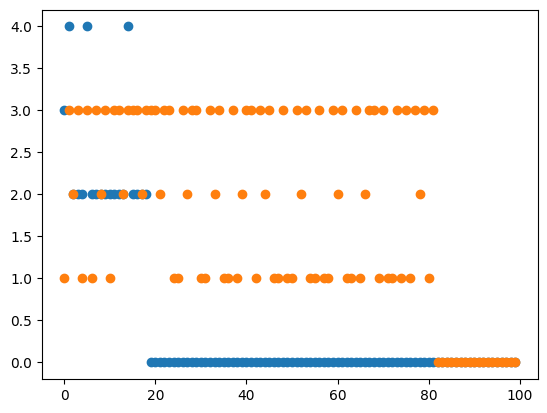

In [5]:
import numpy as np
import matplotlib.pyplot as plt
 
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
        
    def predict(self, x):
        
        total_stimulation = np.dot(x, self.w)       
        y_pred = 1 if total_stimulation > 0 else -1
        return y_pred
        
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            number_of_errors = 0
            
            for x, y_target in zip(X_1,y):
            
                y_pred = self.predict(x)
                delta_w = self.eta * (y_target - y_pred) * x
                self.w += delta_w
                
                number_of_errors += 1 if y_target != y_pred else 0
                
            self.list_of_errors.append(number_of_errors)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, number of errors {}".format(
                        e, self.w, number_of_errors))
                
                
                
X = np.array([
    [2, 4,  20],  # 2*2 - 4*4 + 20 =   8 > 0
    [4, 3, -10],  # 2*4 - 4*3 - 10 = -14 < 0
    [5, 6,  13],  # 2*5 - 4*6 + 13 =  -1 < 0
    [5, 4,   8],  # 2*5 - 4*4 + 8 =    2 > 0
    [3, 4,   5],  # 2*3 - 4*4 + 5 =   -5 < 0 
])
 
y = np.array([1, -1, -1, 1, -1])
 
perceptron = Perceptron(eta=0.1, epochs=100, is_verbose=True)            
perceptron.fit(X, y)
 
print(perceptron.w)
 
print(perceptron.predict(np.array([[1, 2, 3, 1]])))  # 2*1 - 4*2 + 1 = -3 < 0
print(perceptron.predict(np.array([[2, 2, 8, 1]])))  # 2*2 - 4*2 + 8 =  4 > 0
print(perceptron.predict(np.array([[3, 3, 3, 1]])))  # 2*3 - 4*3 + 3 = -3 < 0
 
%matplotlib inline
 
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
 
 
X = np.array([
    [2, 4,  20],  # 2^2 - 4^2 + 20 =  8 > 0
    [4, 3, -10],  # 4^2 - 3^2 - 10 = -3 < 0
    [5, 6,  13],  # 5^2 - 6^2 + 13 =  2 > 0
    [5, 4,  -5],  # 5^2 - 4^2 - 5 =   4 > 0
    [3, 4,   5],  # 3^2 - 4^2 + 5 =  -2 < 0 
 
])
 
y = np.array([1, -1, 1, 1, -1])
 
perceptron = Perceptron(eta=0.5, epochs=100, is_verbose=True)            
perceptron.fit(X, y)
 
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)


Wydajność- działań na macierzach wykonywanych w pętli lub numpy

<ipython-input-7-7b82fa482aa7>:14: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-7-7b82fa482aa7>:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-7-7b82fa482aa7>:16: Depreca

1 - :0.0019538402557373047
2 - :0.0004825592041015625
3 - :0.0010225772857666016
4 - :0.0017523765563964844
5 - :0.027115345001220703
6 - :0.0038852691650390625
7 - :0.006402015686035156
8 - :0.013010978698730469
9 - :0.00948786735534668
10 - :0.010587453842163086
11 - :0.023465394973754883
12 - :0.01761651039123535
13 - :0.019308090209960938
14 - :0.02227187156677246
15 - :0.055464744567871094
16 - :0.05324149131774902
17 - :0.08525562286376953
18 - :0.055734872817993164
19 - :0.07854342460632324
20 - :0.1512894630432129
21 - :0.1384274959564209
22 - :0.11849284172058105
23 - :0.24289274215698242
24 - :0.3014206886291504
25 - :0.2952880859375
26 - :0.20618605613708496
27 - :0.2407243251800537
28 - :0.23055005073547363
29 - :0.31682825088500977
30 - :0.17861223220825195
31 - :0.2332005500793457
32 - :0.31697869300842285
33 - :0.22027063369750977
34 - :0.21056127548217773
35 - :0.30349206924438477
36 - :0.2725071907043457
37 - :0.19568967819213867
38 - :0.25343823432922363
39 - :0.18915

<ipython-input-7-7b82fa482aa7>:35: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-7-7b82fa482aa7>:36: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-7-7b82fa482aa7>:37: Depreca

93 - :0.006853818893432617
94 - :0.01078176498413086
95 - :0.004742145538330078
96 - :0.006521940231323242
97 - :0.006342887878417969
98 - :0.006340980529785156
99 - :0.007794857025146484
100 - :0.008900880813598633


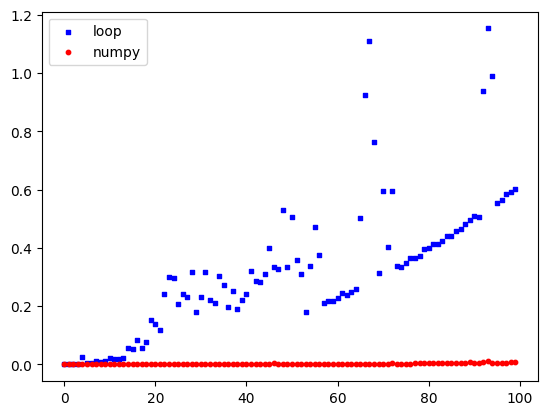

In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


num_iterations = 100
time_results_loop = []
 
for iteration in range(1, num_iterations+1):
    
    start_time = time.time()
    
    data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data3 = np.zeros(shape=(10*iteration, 10*iteration), dtype=np.float)
   
    for i in range(data3.shape[0]):
        for j in range(data3.shape[1]):
            data3[i,j] = data1[i,j] + data2[i,j]
    
    end_time = time.time()
    
    print('{} - :{}'.format(iteration, end_time - start_time))    
    time_results_loop.append(end_time - start_time)
 
 
 
time_results_np = []
 
for iteration in range(1, num_iterations + 1):
 
    start_time = time.time()
    
    data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data3 = np.zeros(shape=(10*iteration, 10*iteration), dtype=np.float)
   
    data3 = data1 + data2
    
    end_time = time.time()
    
    print('{} - :{}'.format(iteration, end_time - start_time))    
    time_results_np.append(end_time - start_time)
 
 
 
fig = plt.figure()
plt.scatter(range(num_iterations), time_results_loop, s=10, c='b', marker="s", label='loop')
plt.scatter(range(num_iterations), time_results_np, s=10, c='r', marker="o", label='numpy')
plt.legend(loc='upper left');
plt.show()


<ipython-input-8-24d89cab615f>:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-8-24d89cab615f>:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-8-24d89cab615f>:10: Deprecati

1 - :0.0027697086334228516
2 - :0.007268667221069336
3 - :0.01327967643737793
4 - :0.03163266181945801
5 - :0.07985472679138184
6 - :0.11401152610778809
7 - :0.17586326599121094
8 - :0.27954816818237305
9 - :0.36963796615600586
10 - :0.5184886455535889
11 - :0.6819186210632324
12 - :0.8576080799102783
13 - :1.1046710014343262
14 - :1.3755381107330322
15 - :2.4154536724090576
16 - :2.630856990814209
17 - :2.411245107650757
18 - :3.8484411239624023
19 - :7.939009666442871
20 - :11.062657356262207
21 - :4.616397380828857
22 - :5.5405755043029785
23 - :6.94303297996521
24 - :11.036755084991455
25 - :11.394458532333374
26 - :8.6722092628479
27 - :11.838106393814087
28 - :15.878015041351318
29 - :15.62689208984375
30 - :15.037902116775513
31 - :16.10686755180359
32 - :18.849637031555176
33 - :18.920644283294678
34 - :33.776164531707764
35 - :23.048015832901
36 - :25.102044820785522
37 - :28.282891750335693
38 - :30.604735136032104
39 - :32.71971535682678
40 - :34.16754937171936
1 - :0.001185

<ipython-input-8-24d89cab615f>:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-8-24d89cab615f>:31: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
<ipython-input-8-24d89cab615f>:32: Depreca

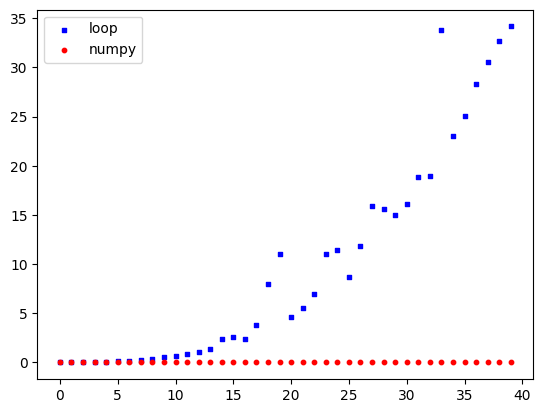

In [8]:
num_iterations = 40
time_results_loop = []
 
for iteration in range(1, num_iterations+1):
    
    start_time = time.time()
    
    data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data3 = np.zeros(shape=(10*iteration, 10*iteration), dtype=np.float)
   
    for i in range(data1.shape[0]): # i - row number
        for j in range(data2.shape[1]): # j - column number
            data3[i,j] = sum([data1[i, v] * data2[v, j] for v in range(data1.shape[1])])
    
    end_time = time.time()
    
    print('{} - :{}'.format(iteration, end_time - start_time))    
    time_results_loop.append(end_time - start_time)
 
 
 
num_iterations = 40
time_results_np = []
 
for iteration in range(1, num_iterations+1):
    
    start_time = time.time()
    
    data1 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data2 = np.ones(shape=(10*iteration, 10*iteration), dtype=np.float)
    data3 = np.zeros(shape=(10*iteration, 10*iteration), dtype=np.float)
   
    data3 = data1.dot(data2)
    
    end_time = time.time()
    
    print('{} - :{}'.format(iteration, end_time - start_time))    
    time_results_np.append(end_time - start_time)
 
 


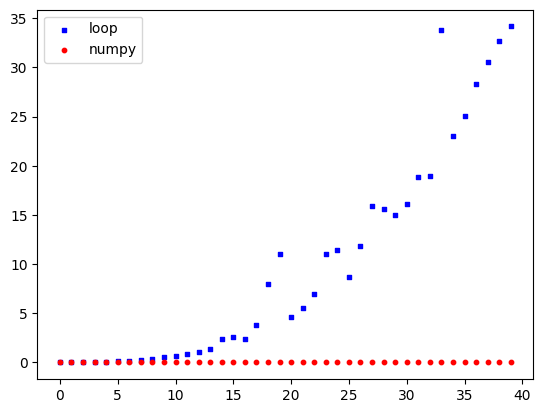

In [14]:

fig = plt.figure()
plt.scatter(range(num_iterations), time_results_loop, s=10, c='b', marker="s", label='loop')
plt.scatter(range(num_iterations), time_results_np, s=10, c='r', marker="o", label='numpy')
plt.legend(loc='upper left');
plt.show()

 Optymalizacja uczenia na przykładzie danych dot. raka piersi

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-13-f1ca61bab433>:53: RuntimeWarning: invalid value encountered in add
  self.w += delta_w


result: 92.98245614035088


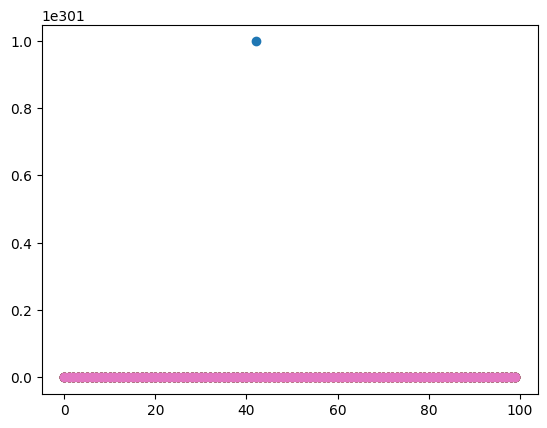

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
%matplotlib inline
 
class Perceptron:
    
    def __init__(self, eta=0.10, epochs=50, is_verbose = False):
        
        self.eta = eta
        self.epochs = epochs
        self.is_verbose = is_verbose
        self.list_of_errors = []
        
    
    def predict(self, x):
        
        ones = np.ones((x.shape[0],1))
        x_1 = np.append(x.copy(), ones, axis=1)
        #activation = self.get_activation(x_1)
        #y_pred = np.where(activation >0, 1, -1)
        #return y_pred
        return np.where(self.get_activation(x_1) > 0, 1, -1)
        
    
    def get_activation(self, x):
        
        activation = np.dot(x, self.w)
        return activation
     
    
    def fit(self, X, y):
        
        self.list_of_errors = []
        
        ones = np.ones((X.shape[0], 1))
        X_1 = np.append(X.copy(), ones, axis=1)
 
        self.w = np.random.rand(X_1.shape[1])
        
        for e in range(self.epochs):
 
            error = 0
            
            activation = self.get_activation(X_1)
            delta_w = self.eta * np.dot((y - activation), X_1)
            self.w += delta_w
                
            error = np.square(y - activation).sum()/2.0
                
            self.list_of_errors.append(error)
            
            if(self.is_verbose):
                print("Epoch: {}, weights: {}, error {}".format(
                        e, self.w, error))
 
 
 
 
 
diag = pd.read_csv(r"breast_cancer.csv")
 
X = diag[['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']]
X
 
y= diag['diagnosis']
y = y.apply(lambda d: 1 if d == 'M' else -1)
y
perceptron = Perceptron(eta=0.00001, epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
perceptron = Perceptron(eta=0.00000001, epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
perceptron = Perceptron(eta=0.000000001, epochs=100)
perceptron.fit(X,y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
 
perceptron = Perceptron(eta=0.01, epochs=100)
perceptron.fit(X_std, y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
perceptron = Perceptron(eta=0.001, epochs=100)
perceptron.fit(X_std, y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
perceptron = Perceptron(eta=0.000000001, epochs=100)
perceptron.fit(X_std, y)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
 
perceptron = Perceptron(eta=0.001, epochs=100)
perceptron.fit(X_train, y_train)
plt.scatter(range(perceptron.epochs), perceptron.list_of_errors)
 
y_pred = perceptron.predict(X_test)
 
good = y_test[y_test == y_pred].count()
total = y_test.count()
print('result: {}'.format(100*good/total))

 Model perceptronu z scikit-learn

In [12]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
 
 
diag = pd.read_csv(r"breast_cancer.csv")
 
X = diag[['area_mean', 'area_se', 'texture_mean', 'concavity_worst', 'concavity_mean']]
X
 
y= diag['diagnosis']
y = y.apply(lambda d: 1 if d == 'M' else -1)
y
 
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
 
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2)
 
 
perceptron = Perceptron(eta0=0.01, max_iter=100)
perceptron.fit(X_train, y_train)
 
y_pred = perceptron.predict(X_test)
 
good = y_test[y_test == y_pred].count()
total = y_test.count()
print('result: {}'.format(100*good/total))


result: 92.10526315789474
